In [15]:
import tensorflow as tf
import numpy as np

2022-11-15 12:18:31.914998: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 12:18:34.959591: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9660 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5
2022-11-15 12:18:34.961400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9660 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5
2022-11-15 12:18:34.962131: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/repli

## Block pushing

In [47]:
actions = []

for i in range(0, 7+1):
    raw_dataset = tf.data.TFRecordDataset(f'/home/nikita/e2e-driving/notebooks/block_push_states_location/oracle_push_{i}.tfrecord')
    for raw_record in raw_dataset:
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        record_actions = example.features.feature['action'].float_list.value
        actions.append(record_actions)

In [48]:
actions_np = np.array(actions)
actions_np.shape

(76626, 2)

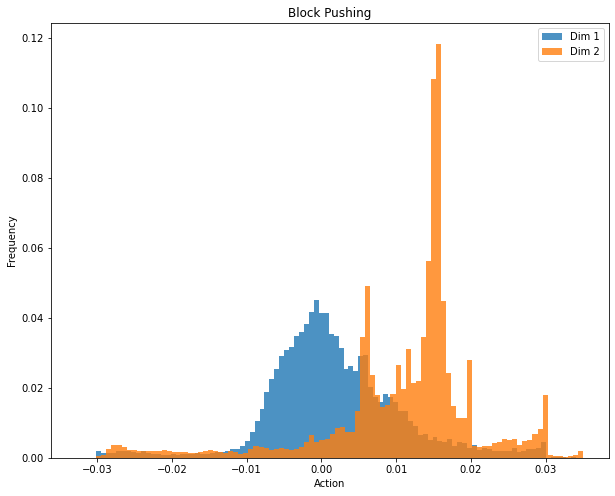

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# show probabilities of actions
weights = np.ones_like(actions_np[:, 0])/float(len(actions_np))
plt.title('Block Pushing')
plt.hist(actions_np[:, 0], bins=100, label='Dim 1', alpha=0.8, weights=weights)
plt.ylabel('Frequency')
plt.xlabel('Action')
plt.hist(actions_np[:, 1], bins=100, label='Dim 2', alpha=0.8, weights=weights)
plt.legend()
plt.show()

## Particles 2D

In [50]:
actions = []

for i in range(0, 9+1):
    raw_dataset = tf.data.TFRecordDataset(f'/home/nikita/e2e-driving/notebooks/particle/2d_oracle_particle_{i}.tfrecord')
    for raw_record in raw_dataset:
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        record_actions = example.features.feature['action'].float_list.value
        actions.append(record_actions)

In [51]:
actions_np = np.array(actions)
actions_np.shape

(102000, 2)

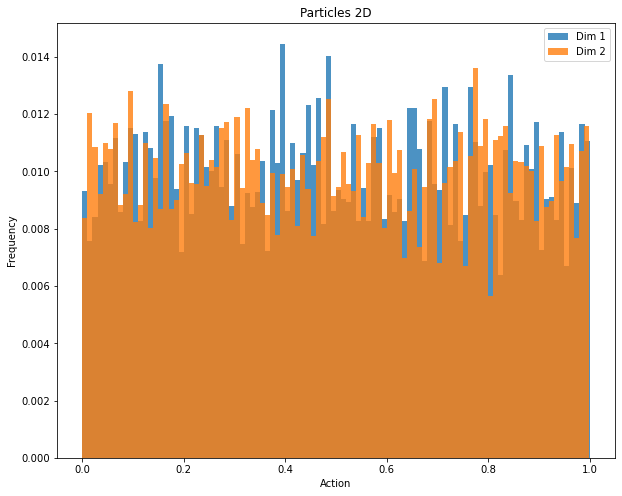

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# show probabilities of actions
weights = np.ones_like(actions_np[:, 0])/float(len(actions_np))
plt.title('Particles 2D')
plt.hist(actions_np[:, 0], bins=100, label='Dim 1', alpha=0.8, weights=weights)
plt.ylabel('Frequency')
plt.xlabel('Action')
plt.hist(actions_np[:, 1], bins=100, label='Dim 2', alpha=0.8, weights=weights)
plt.legend()
plt.show()

## D4RL: Kitchen Complete

In [53]:
actions = []

for i in range(0, 4+1):
    raw_dataset = tf.data.TFRecordDataset(f'/home/nikita/e2e-driving/notebooks/kitchen-complete-v0/kitchen-complete-v0_{i}.tfrecord')
    for raw_record in raw_dataset:
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        record_actions = example.features.feature['action'].float_list.value
        actions.append(record_actions)

In [54]:
actions_np = np.array(actions)
actions_np.shape

(3680, 9)

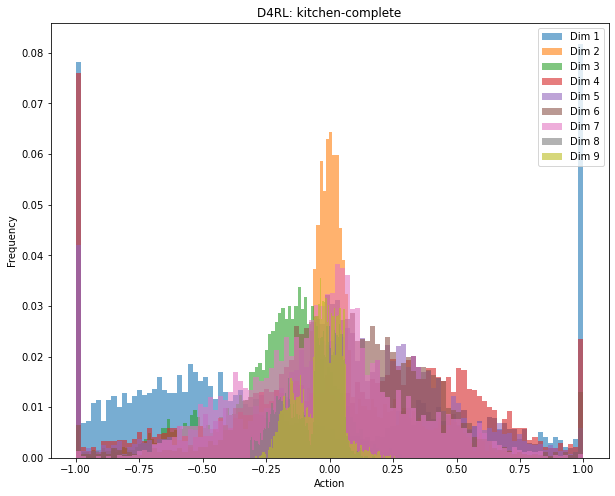

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# show probabilities of actions
weights = np.ones_like(actions_np[:, 0])/float(len(actions_np))
plt.title('D4RL: kitchen-complete')
for i in range(actions_np.shape[1]):
    plt.hist(actions_np[:, i], bins=100, label=f'Dim {i+1}', alpha=0.6, weights=weights)
plt.ylabel('Frequency')
plt.xlabel('Action')
plt.legend()
plt.show()